# **Analyze the Influence of Crime Types on the Arrest Rate in Different Areas of Chicago.**

## Introduction ##

Crime is a complex and multifaceted issue that has significant implications for public safety and community well-being. In general, Crime could be divided into two types, violent and non-violent crime; furthermore, crimes like "Homicide", "Assault", and "Robbery" are considered violent, while crimes like "Theft" and "Property damage" are non-violent. The city of Chicago, like many urban centers, experiences a diverse range of criminal activities. Therefore, Chicago has been grappling with crime-related concerns, and understanding the factors influencing arrest rates can offer valuable insights into effective law enforcement strategies and community safety. This dataset reference is extracted from the Chicago Police Department's CLEAR (Citizen Law Enforcement Analysis and Reporting) system and hosted in Google BigQuery, which contains incidents of crime except murders that occurred in the city of Chicago from 2001 to 2024.

This project seeks to analyze the relationship between different crime types and areas of Chicago and the arrest rate from 2002 to 2023. Also, we will explore the influence of some economic factors on different crime types in various regions, contributing to our understanding of the nuanced factors affecting arrest rates in Chicago. Throughout our analysis, we will employ statistical tools, including histograms, box plots, and line charts, to visually represent the relationships between crime types, locations, and arrest rates. These visualizations will provide valuable insights into patterns and trends within the dataset.

The outcome of this project is arrest rate and there are two independent variables, crime types and location. For the first variable (X_1), there are 35 crime types in the dataset. The second variable (X_2) is the community area which includes 77 areas where the incident occurred in Chicago. The type of crime in a given area can significantly affect law enforcement strategies, community safety perceptions, and arrest rates. In addition, factors such as socioeconomic conditions, population density, and community policing strategies may contribute to differences in arrest rates across locations. Hence, after this research, we could understand how different crime types and locations relate to arrest rates, and so learn more about Chicago's crime dynamics. However, it is essential to acknowledge the limitations inherent in this study, such as potential data constraints and external factors influencing crime dynamics.

## Data Cleaning and Loading

Before summarising, we need to clean our original dataset first. In this section, we will drop some columns that are useless to our research, such as 'ICUR', 'Domestic', 'Beat', and 'Ward'. Moreover, in the years 2001 and 2024, the number of incidents is much less than in other years, so we decided to remove these two years' data. Also, there are some incidents that do not keep detailed records, so we need to clean those data to get a more complete dataset, called 'chicago_crime_clean'. To keep the data clean, we change the data of 'District' and 'Community Area' from float to integer.

In [133]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
relative_path = os.path.join('..', 'Data', 'Chicago_Crime.csv')
abs_path = os.path.abspath(relative_path)

# Read the CSV file
chicago_crime = pd.read_csv(abs_path)

In [306]:
# Drop missing value
chicago_crime_clean = chicago_crime.dropna()
# Drop useless columns
chicago_crime_clean = chicago_crime_clean.drop(['Date','IUCR','Location Description','Domestic','Beat',
                                                'Ward','Block','FBI Code','X Coordinate','Y Coordinate',
                                                'Updated On'], axis=1)
# Drop year 2001 and 2024
chicago_crime_clean = chicago_crime_clean[(chicago_crime_clean['Year'] != 2001) & (chicago_crime_clean['Year'] != 2024)]
# Change 'District' and ' Community Area' data into int
chicago_crime_clean['District'] = chicago_crime_clean['District'].astype(int)
chicago_crime_clean['Community Area'] = chicago_crime_clean['Community Area'].astype(int)
# Drop community area missing value
chicago_crime_clean = chicago_crime_clean[chicago_crime_clean['Community Area'] !=0]
# Drop duplicates to keep unique rows
type_mapping = {'CRIM SEXUAL ASSAULT':'CRIMINAL SEXUAL ASSAULT', 'NON - CRIMINAL':'NON-CRIMINAL'}
chicago_crime_clean['Primary Type'] = chicago_crime_clean['Primary Type'].replace(type_mapping)
chicago_crime_clean = chicago_crime_clean.drop_duplicates()
chicago_crime_clean.head()

,ID,Case Number,Primary Type,Description,Arrest,District,Community Area,Year,Latitude,Longitude,Location
11,12045583,JD226426,THEFT,$500 AND UNDER,False,2,35,2020,41.830482,-87.621752,"(41.830481843, -87.621751752)"
12,12031001,JD209965,BATTERY,SIMPLE,True,9,60,2020,41.836310,-87.639624,"(41.836310224, -87.639624112)"
13,12093529,JD282112,ASSAULT,AGGRAVATED - HANDGUN,True,4,46,2020,41.747610,-87.549179,"(41.747609555, -87.549179329)"
14,12178140,JD381597,BATTERY,SIMPLE,False,7,67,2020,41.774878,-87.671375,"(41.77487752, -87.671374872)"
15,4144897,HL474854,BATTERY,AGGRAVATED: OTHER DANG WEAPON,False,7,68,2005,41.781003,-87.652107,"(41.781002663, -87.652107119)"


In [307]:
chicago_crime_clean.shape

(7268092, 11)

## Summary Statistics Tables

### X_1: Crime Types

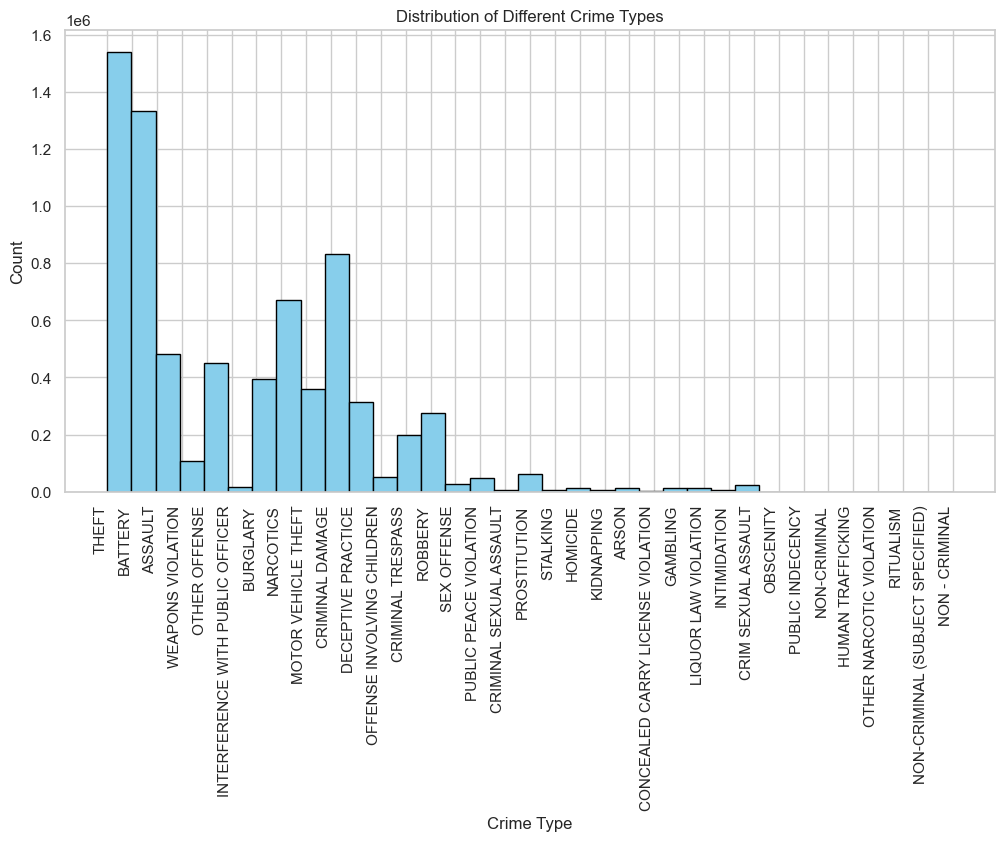

In [303]:
crime_type_counts = chicago_crime_clean['Primary Type'].value_counts()

# Create a histogram
plt.figure(figsize=(12, 6))
plt.hist(chicago_crime_clean['Primary Type'], bins=len(crime_type_counts), color='skyblue', edgecolor='black')
plt.title('Distribution of Different Crime Types')
plt.xlabel('Crime Type')
plt.ylabel('Count')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability
plt.show()

The histogram is the distribution of crime types and it looks right-skewed, but we cannot give up any crime types' data since we are going to analyze how crime types influence arrest rates, also these incidents will keep happening in our lives even though the amount that occurs is small. The graph gives us information that the number of crime types of theft and battery is the highest.

In [308]:
# Create a pivot table to count the number of 'True' and 'False' in each primary type
arrest_count = chicago_crime_clean.pivot_table(index='Primary Type', columns='Arrest', aggfunc='size', fill_value=0)
# Rename culumns to clarify
arrest_count.columns = ['Arrested (False)', 'Arrested (True)']
arrest_count = arrest_count.reset_index()
arrest_count

,Primary Type,Arrested (False),Arrested (True)
0,ARSON,10781,1458
1,ASSAULT,382039,100044
2,BATTERY,1040637,290995
3,BURGLARY,373154,22361
4,CONCEALED CARRY LICENSE VIOLATION,44,1172
5,CRIMINAL DAMAGE,779349,54229
6,CRIMINAL SEXUAL ASSAULT,26981,4056
7,CRIMINAL TRESPASS,62190,137047
8,DECEPTIVE PRACTICE,273095,40430
9,GAMBLING,93,13321


The pivot table shows the first variable, crime types, influence on the arrest rate from 2002 to 2023 in Chicago. This table includes all 33 crime types and we only consider primary types and exclude all other factors here. We can see how many successful and unsuccessful arrests for each crime type. However, it is difficult to identify which crime types have higher and lower arrest rates, so we will show the result below.

In [309]:
# Identify the crime type with the maximum 'True' arrests
max_arrested_type = arrest_count.loc[arrest_count['Arrested (True)'].idxmax()]
print(max_arrested_type)

# Identify the crime type with the minimum 'True' arrests
min_arrested_type = arrest_count.loc[arrest_count['Arrested (True)'].idxmin()]
print(min_arrested_type)

# Identify the crime type with the maximum 'False' arrests
max_unarrested_type = arrest_count.loc[arrest_count['Arrested (False)'].idxmax()]
print(max_unarrested_type)

# Identify the crime type with the minimum 'False' arrests
min_unarrested_type = arrest_count.loc[arrest_count['Arrested (False)'].idxmin()]
print(min_unarrested_type)

Primary Type        NARCOTICS
Arrested (False)         4354
Arrested (True)        668226
Name: 17, dtype: object
Primary Type        RITUALISM
Arrested (False)           13
Arrested (True)             2
Name: 27, dtype: object
Primary Type          THEFT
Arrested (False)    1374957
Arrested (True)      165412
Name: 31, dtype: object
Primary Type        PUBLIC INDECENCY
Arrested (False)                   3
Arrested (True)                  184
Name: 25, dtype: object


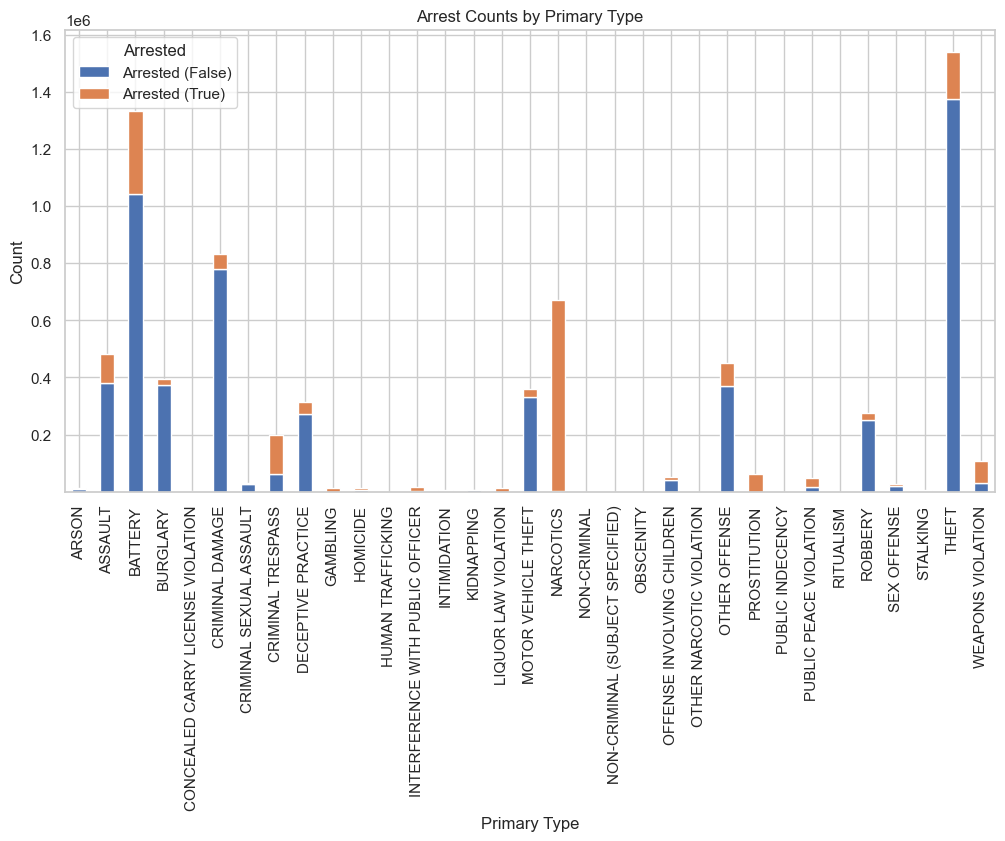

In [310]:
arrest_count.set_index('Primary Type', inplace=True)

# Plot the bar plot
arrest_count.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Arrest Counts by Primary Type')
plt.xlabel('Primary Type')
plt.ylabel('Count')
plt.legend(title='Arrested')
plt.show()

It is clear to see that in all of the 33 crime types, 'Narcotics' has the highest arrest quantity with 668226, while 'Ritualism' has the lowest quantity, which is 2. In addition, of all the types of crimes that were not apprehended, 'Thief' is the most, with 1374957, but 'Public indecency' is the opposite with 3. And from the graph above, the x-axis is the primary crime type and the y-axis is the number of successful and unsuccessful arrests. We can see that only a few types of crime have more arrests than no arrests, like 'Narcotics', 'Criminal trespass', and 'Weapons violation'. However, this data is not accurate since we only show the ratio of arrests to non-arrests, but we do not know the specific rates. Therefore, we need to calculate the percentage of arrest rate and then compare it to see more valuable results.

In [311]:
arrest_count['Percent_Arrested (True)'] = (arrest_count['Arrested (True)'] / (arrest_count['Arrested (False)'] + 
                                                                              arrest_count['Arrested (True)'])) * 100
print(arrest_count.loc[arrest_count['Percent_Arrested (True)'].idxmax()])
print(arrest_count.loc[arrest_count['Percent_Arrested (True)'].idxmin()])
print(arrest_count.describe())

Arrested (False)             277.000000
Arrested (True)            61181.000000
Percent_Arrested (True)       99.549286
Name: PROSTITUTION, dtype: float64
Arrested (False)           373154.000000
Arrested (True)             22361.000000
Percent_Arrested (True)         5.653641
Name: BURGLARY, dtype: float64
       Arrested (False)  Arrested (True)  Percent_Arrested (True)
count      3.300000e+01        33.000000                33.000000
mean       1.640142e+05     56231.030303                41.441135
std        3.246437e+05    125913.303927                36.313729
min        3.000000e+00         2.000000                 5.653641
25%        1.670000e+02       623.000000                11.912738
50%        6.564000e+03     12790.000000                20.752443
75%        2.508970e+05     54229.000000                72.812999
max        1.374957e+06    668226.000000                99.549286


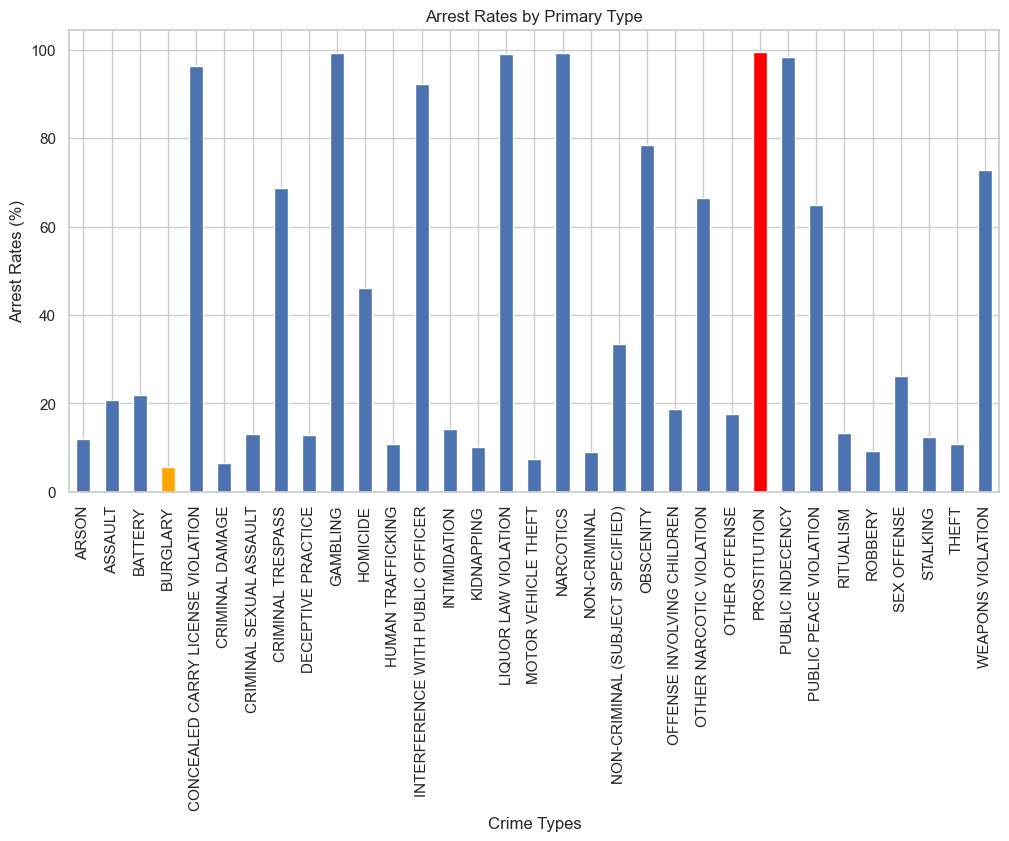

In [312]:
ax = arrest_count.plot(kind='bar', y='Percent_Arrested (True)', legend=False, figsize=(12, 6))
max_index = arrest_count['Percent_Arrested (True)'].idxmax()
min_index = arrest_count['Percent_Arrested (True)'].idxmin()
ax.patches[arrest_count.index.get_loc(max_index)].set_facecolor('red')
ax.patches[arrest_count.index.get_loc(min_index)].set_facecolor('orange')
plt.title('Arrest Rates by Primary Type')
plt.xlabel('Crime Types')
plt.ylabel('Arrest Rates (%)')
plt.show()

Now, we can easily see that the crime type of prostitution has the highest arrest rate at about 99.549%, while the type of burglary has the lowest arrest rate at about 5.654%. Also, the average arrest rate is 41.441% approximately, which means more than half of the suspects are not arrested. This bar chart with each crime type on the x-axis and arrest rates on the y-axis, shows that most of the crime types have either high arrest rates greater than 60% or low arrest rates less than 25%. According to the distribution of crime types before, we found that 'theft' and 'battery' are the most frequent occurrences but their arrest rates are not the highest, which describes from the side that it is very difficult to catch this type of criminal. Again, it expresses crime types will influence arrest rates to a certain degree.

### X_2: Areas of Chicago

In this part, we will focus on how community areas will influence arrest rates without other factors.

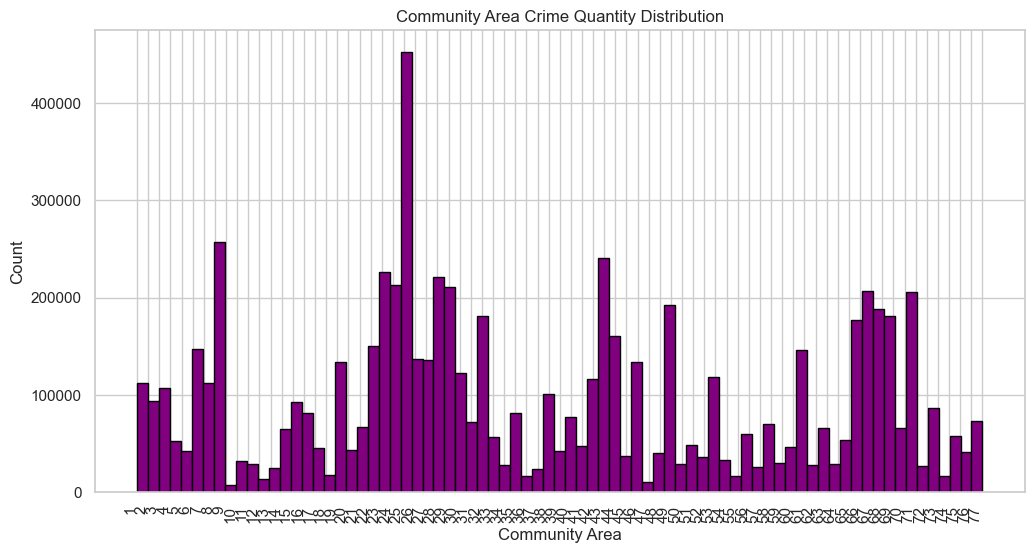

In [313]:
area_counts = chicago_crime_clean['Community Area'].value_counts()

# Create a histogram
plt.figure(figsize=(12, 6))
plt.hist(chicago_crime_clean['Community Area'], bins=len(area_counts), color='purple', edgecolor='black')
plt.title('Community Area Crime Quantity Distribution')
plt.xlabel('Community Area')
plt.ylabel('Count')
plt.xticks(sorted(chicago_crime_clean['Community Area'].unique()), rotation=90, ha='right')
plt.show()

The histogram above shows the number of crimes distributed in each community area in Chicago. It is significant to see that Area 25 has the most quantity and Area 9 has the lowest from 2002 to 2023. We will see whether these two areas also have the most and least arrest rates later.

In [314]:
# Create a pivot table to count the number of 'True' and 'False' in each community area
arrest_count2 = chicago_crime_clean.pivot_table(index='Community Area', columns='Arrest', aggfunc='size', fill_value=0)
arrest_count2.columns = ['Arrested (False)', 'Arrested (True)']
arrest_count2 = arrest_count2.reset_index()
arrest_count2

,Community Area,Arrested (False),Arrested (True)
0,1,83419,29095
1,2,78552,15000
2,3,75831,31001
3,4,43001,9170
4,5,35139,7591
...,...,...,...
72,73,67888,18825
73,74,13758,2530
74,75,45596,12323
75,76,31588,9492


In [315]:
# Identify the community area with the maximum 'True' arrests
max_arrested_area = arrest_count2.loc[arrest_count2['Arrested (True)'].idxmax()]
print(max_arrested_area)

# Identify the community area with the minimum 'True' arrests
min_arrested_area = arrest_count2.loc[arrest_count2['Arrested (True)'].idxmin()]
print(min_arrested_area)

# Identify the community area with the maximum 'False' arrests
max_unarrested_area = arrest_count2.loc[arrest_count2['Arrested (False)'].idxmax()]
print(max_unarrested_area)

# Identify the community area with the minimum 'False' arrests
min_unarrested_area = arrest_count2.loc[arrest_count2['Arrested (False)'].idxmin()]
print(min_unarrested_area)

Community Area          25
Arrested (False)    284329
Arrested (True)     168020
Name: 24, dtype: int64
Community Area         9
Arrested (False)    6387
Arrested (True)      823
Name: 8, dtype: int64
Community Area          25
Arrested (False)    284329
Arrested (True)     168020
Name: 24, dtype: int64
Community Area         9
Arrested (False)    6387
Arrested (True)      823
Name: 8, dtype: int64


From the table above, we know that there are 77 community areas in Chicago. Moreover, the summary information tells us area 25 has the highest number of successful arrests with 168020 but also the highest number of unsuccessful arrests with 284329. Area 9 has the same situation and has the lowest number of successful and unsuccessful arrests with 823 and 6387. This result is the same as what we got from the histogram before. The summary above illustrates community areas will cause the difference in arrest rates. Now, we will calculate the percentage of arrest rates to get more detailed.

In [316]:
arrest_count2['Percent_Arrested (True)'] = (arrest_count2['Arrested (True)'] / (arrest_count2['Arrested (False)'] + 
                                                                              arrest_count2['Arrested (True)'])) * 100
print(arrest_count2.loc[arrest_count2['Percent_Arrested (True)'].idxmax()])
print(arrest_count2.loc[arrest_count2['Percent_Arrested (True)'].idxmin()])
print(arrest_count2.describe())

Community Area                26.000000
Arrested (False)           77811.000000
Arrested (True)            58620.000000
Percent_Arrested (True)       42.966774
Name: 25, dtype: float64
Community Area                12.000000
Arrested (False)           12100.000000
Arrested (True)             1402.000000
Percent_Arrested (True)       10.383647
Name: 11, dtype: float64
       Community Area  Arrested (False)  Arrested (True)  \
count       77.000000         77.000000        77.000000   
mean        39.000000      70291.792208     24099.012987   
std         22.371857      54214.181844     25795.026325   
min          1.000000       6387.000000       823.000000   
25%         20.000000      28961.000000      6857.000000   
50%         39.000000      53404.000000     14875.000000   
75%         58.000000      99376.000000     33282.000000   
max         77.000000     284329.000000    168020.000000   

       Percent_Arrested (True)  
count                77.000000  
mean                 22

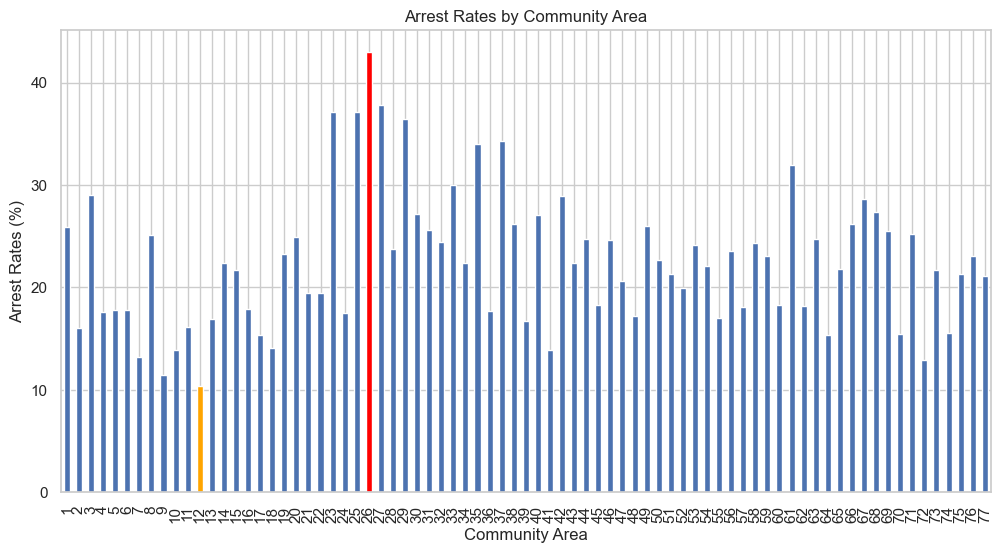

In [317]:
ax2 = arrest_count2.plot(kind='bar', x='Community Area', y='Percent_Arrested (True)', legend=False, figsize=(12, 6))
max_index2 = arrest_count2['Percent_Arrested (True)'].idxmax()
min_index2 = arrest_count2['Percent_Arrested (True)'].idxmin()
ax2.patches[arrest_count2.index.get_loc(max_index2)].set_facecolor('red')
ax2.patches[arrest_count2.index.get_loc(min_index2)].set_facecolor('orange')
plt.title('Arrest Rates by Community Area')
plt.xlabel('Community Area')
plt.ylabel('Arrest Rates (%)')
plt.show()

The bar plot above shows each community area with respect to arrest rates. Through observation, we can see that Area 12 has the lowest arrest rate at 10.384%, and Area 26 has the highest arrest rate at 42.967%. It is different from what we discussed before, Area 25 and Area 9 do not have the highest and lowest arrest rates, so there should be other factors that influence it. In addition, the average arrest rate is about 22.535%, which is less than the arrest rates we have seen before based on the type of crime. Hence, our research question is reasonable cause these two variables will affect arrest rates, and we will combine crime types and community areas to get more specific research.

### Combine two variables

In [352]:
combine = chicago_crime_clean.groupby(['Community Area','Primary Type']).agg({'Arrest':['sum','mean']})
combine.columns = [f'{col[0]}_{col[1]}' if col[1] else col[0] for col in combine.columns]

# Sort the DataFrame by the sum of arrests in descending order
combine_sort_sum = combine.sort_values(by=('Arrest_sum'),ascending=False)
print(combine_sort_sum.head())
# Sort the DataFrame by the mean of arrests in descending order
combine_sort_mean = combine.sort_values(by=('Arrest_mean'),ascending=False)
print(combine_sort_mean.head())
# Sort the DataFrame by the sum of arrests in ascending order
combine_desort_sum = combine.sort_values(by=('Arrest_sum'),ascending=True)
print(combine_desort_sum.head())
# Sort the DataFrame by the mean of arrests in ascending order
combine_desort_mean = combine.sort_values(by=('Arrest_mean'),ascending=True)
print(combine_desort_mean.head())

                             Arrest_sum  Arrest_mean
Community Area Primary Type                         
25             NARCOTICS          92320     0.997881
23             NARCOTICS          49704     0.996951
29             NARCOTICS          43836     0.993203
26             NARCOTICS          35966     0.997615
27             NARCOTICS          29452     0.997224
                                 Arrest_sum  Arrest_mean
Community Area Primary Type                             
49             PUBLIC INDECENCY           2          1.0
65             NON-CRIMINAL               1          1.0
54             PROSTITUTION               4          1.0
41             PROSTITUTION               4          1.0
65             PROSTITUTION              20          1.0
                                         Arrest_sum  Arrest_mean
Community Area Primary Type                                     
15             NON-CRIMINAL                       0          0.0
39             NON-CRIMINAL        

The statistics data above shows the number of top five arrests and average arrests based on different community areas and crime types from 2002 to 2023. We can see that no matter in which community area, the 'Narcotics' crime type has the highest number of arrests. But combining the second data, it does not have the highest arrest rates, which implies there are more crimes than arrests. The second statistical data shows the top five data based on average arrests, so we can see that some cases in different community areas have 100% arrest rates. It seems like 'Prostitution' has the highest arrest rate no matter in which area. Hence, these data verify our guess that crime types and community areas influence arrest rates.

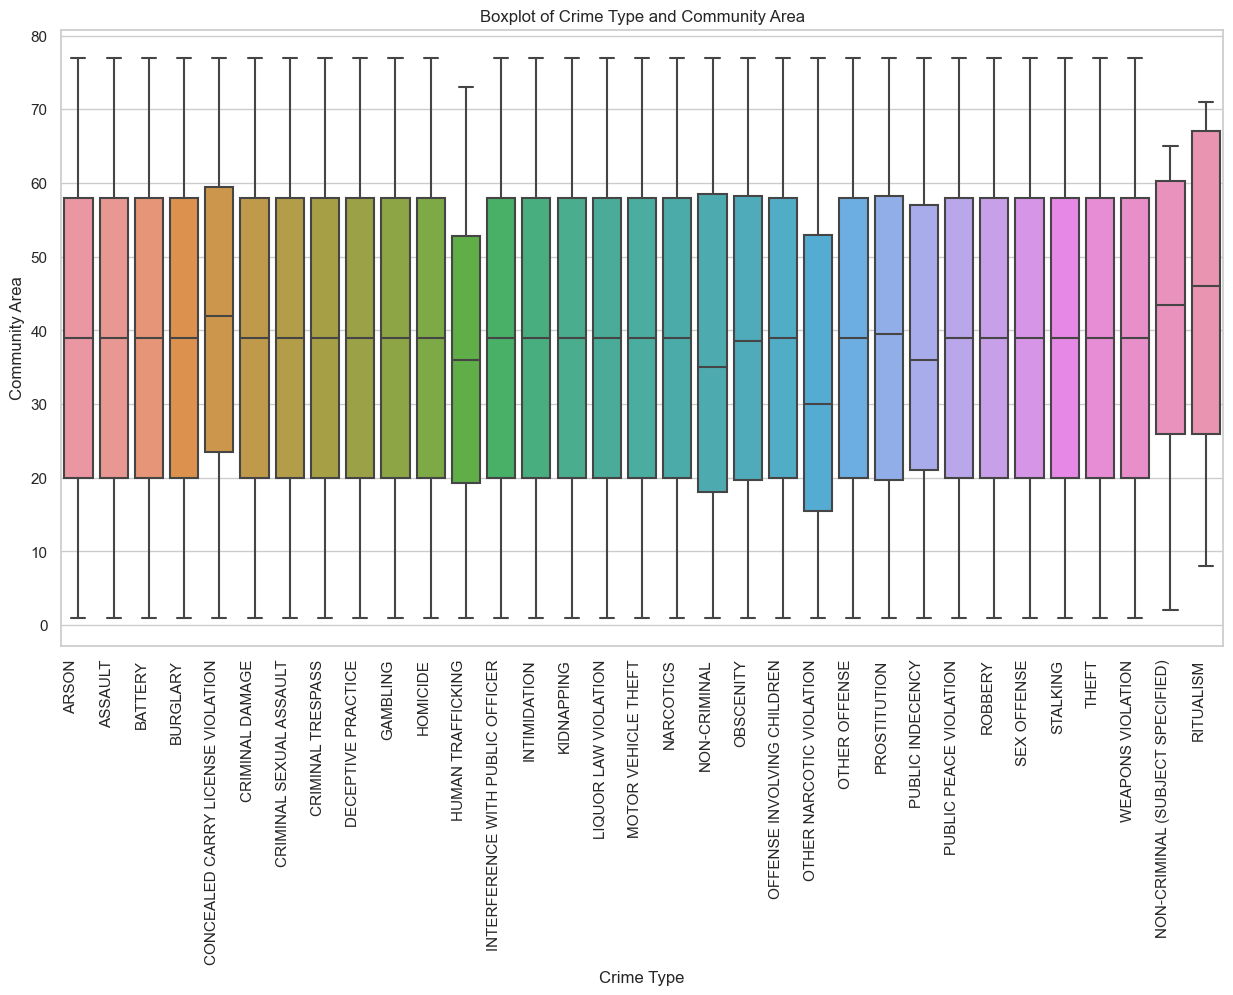

In [319]:
combine_reset = combine.reset_index()

plt.figure(figsize=(15, 8))
sns.boxplot(x='Primary Type', y='Community Area', data=combine_reset)
plt.xticks(rotation=90, ha='right')
plt.title('Boxplot of Crime Type and Community Area')
plt.xlabel('Crime Type')
plt.ylabel('Community Area')

plt.show()

The boxplot above shows the relationship between two variables, crime types and community area. The reason for making this plot is to explore situations of crime types in each community. It is easy to see that 8 types of crime that do not occur in every community, which are 'Concealed carry license violation', 'Human trafficking', 'Non-criminal', 'Other narcotic violation', 'Prostitution', 'Public indecency', 'Non-criminal (subject specified)', and 'Ritualism'. These differences cause different arrest rates.

In [357]:
combine2 = chicago_crime_clean.groupby(['Community Area', 'Primary Type']).size().reset_index(name='Count')
# Sort the DataFrame by community area and count
combine_sorted = combine2.sort_values(by=['Community Area', 'Count'], ascending=[True, False])
# Set 'Community Area' as the index
new = combine_sorted.set_index('Community Area', inplace=True)
new = combine_sorted.groupby('Community Area')
print(new.get_group(12).head())
print(new.get_group(26).head())

                      Primary Type  Count
Community Area                           
12                           THEFT   3473
12                 CRIMINAL DAMAGE   2458
12                        BURGLARY   1453
12                         BATTERY   1369
12              DECEPTIVE PRACTICE   1261
                   Primary Type  Count
Community Area                        
26                    NARCOTICS  36052
26                      BATTERY  26965
26                        THEFT  14826
26              CRIMINAL DAMAGE  11208
26                      ASSAULT   8024


We show the quantity of the top five crime types of areas 12 and 26 above since we want to verify whether crime types will influence arrest rates in community areas. Through observation, we found that the lowest arrest rate in Area 12 has the most counts of theft, which is the largest number of uncaptured species; and Area 26 with the highest arrest rate has the most counts of narcotics, the most arrested quantity. Therefore, we suspect that crime type might influence one area's arrest rate.

In [351]:
most_frequent_type_idx = combine2.groupby('Community Area')['Count'].idxmax()
# Create a DataFrame with the most frequent 'Primary Type' for each 'Community Area'
most_frequent_types = combine2.loc[most_frequent_type_idx][['Community Area', 'Primary Type', 'Count']]
# Count the number of areas where each crime type occurs the most
area_counts = most_frequent_types.groupby('Primary Type').size().reset_index(name='Area Count')
print(area_counts)

worst_frequent_type_idx = combine2.groupby('Community Area')['Count'].idxmin()
# Create a DataFrame with the worst frequent 'Primary Type' for each 'Community Area'
worst_frequent_types = combine2.loc[worst_frequent_type_idx][['Community Area', 'Primary Type', 'Count']]
# Count the number of areas where each crime type occurs the worst
area_counts2 = worst_frequent_types.groupby('Primary Type').size().reset_index(name='Area Count')
print(area_counts2)

      Primary Type  Area Count
0          BATTERY          25
1  CRIMINAL DAMAGE           1
2        NARCOTICS           4
3            THEFT          47
                        Primary Type  Area Count
0  CONCEALED CARRY LICENSE VIOLATION           8
1                           GAMBLING           1
2                  HUMAN TRAFFICKING          24
3   INTERFERENCE WITH PUBLIC OFFICER           1
4                       NON-CRIMINAL          18
5   NON-CRIMINAL (SUBJECT SPECIFIED)           2
6           OTHER NARCOTIC VIOLATION           9
7                       PROSTITUTION           1
8                   PUBLIC INDECENCY           8
9                          RITUALISM           5


Here, it represents 4 types of crime that occur the most in each area of Chicago and 8 types of crime that occur the least. We know that in 77 community areas, theft is the most common crime in these areas, which happened the most frequently in 47 areas. Battery is the second-highest crime type in 25 out of 77 areas. On the contrary, there are 24 areas where human trafficking occurs the least in all of the crime types.

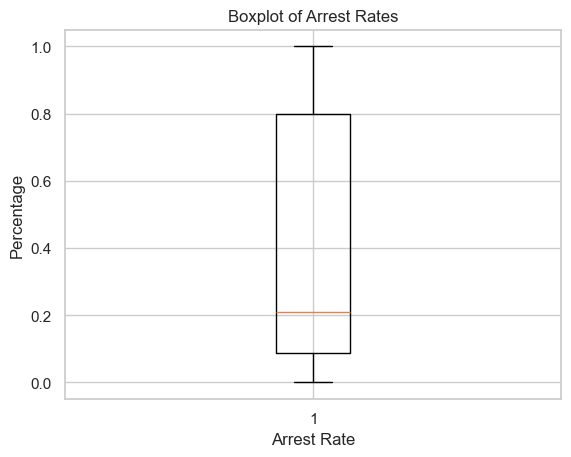

In [255]:
arrest_rates = combine['Arrest_mean']

# Create a boxplot for arrest rates
plt.boxplot(arrest_rates)
plt.title('Boxplot of Arrest Rates')
plt.xlabel('Arrest Rate')
plt.ylabel('Percentage')
plt.show()

The boxplot of arrest rates represents the arrest rates based on 33 crime types and 77 community areas. We can see that its min is 0% and max is 100%, but the median rate is only around 20% and is a right-skewed plot. In the total dataset, the 25th percentile of the arrest rate is around 8% and the 75th percentile is around 80%, which is a huge difference.

## Coclusion

In this research, we are trying to analyze whether crime types influence arrest rates in different community areas of Chicago from 2002 to 2023. With our statistical and visual analysis, we see that prostitution has the highest arrest rate no matter when we consider only crime types one variable or discuss based on crime types and community areas two variables. In addition, from the end analysis, we know that in 47 out of 77 regions, the most frequent type of crime was theft, but with our initial exploration, the number of people who were not arrested for theft was also the highest, even though it does not have the lowest arrest rate. Also, we found that the number of types of crime in an area affects the arrest rate in that area. Area 26 has the highest arrest rate at around 42.967%, while Area 12 only has about 10.384%.

Based on crime types and community areas, the arrest rate has a large range with a minimum of 0% and a maximum of 100%. The average arrest rate is only around 20%, which implies in a significant portion of the data, arrests were made for approximately 20% of reported incidents. This indicates considerable variability in law enforcement outcomes across different crime types and community areas. In conclusion, the data highlights the complexity and diversity of arrest outcomes in the context of crime types and community areas. Therefore, we will keep further analysis and explore how community areas and crime types influence arrest rates.